## Averag multiple 1D plots
(eg multiple timeseries)

In [2]:
import tifffile as tif
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import center_of_mass as com
from scipy.optimize import curve_fit
import os
from scipy.signal import detrend
import scipy.io as sio
from tqdm import tqdm
import math

from mda import *

In [3]:
%matplotlib notebook

#Needs to follow inline magick command
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20
plt.rcParams['image.cmap'] = 'viridis'

In [40]:
#data=np.loadtxt('/CNMshare/savedata/2018R3/cool_down_2.txt', skiprows=2000, usecols=(2,3,4,5,6,7))
start_scan=96
end_scan=99
scan_numbers=np.arange(start_scan, end_scan)
#E_start=8.325
#E_step=0.0005
channel=8
norm_channel=1 #Channel to normalize over

#data=np.loadtxt('/CNMshare/savedata/2018R3/cool_down_2.txt', skiprows=2000, usecols=(2,3,4,5,6,7))
start_scan2=1070
end_scan2=1078
#scan_numbers=[96,97,98,99,100,101]
scan_numbers2=np.arange(start_scan2, end_scan2)
E_start2=8.325
E_step2=0.005
channel2=10
norm_channel2=1 #Channel to normalize over

In [41]:
d=[]
norms=[]
x_vals=[]
for s in scan_numbers:
    path='/Volumes/sector26/2019R2/20190806/mda/26idbSOFT_%04d'  %s #Scan path
    data=readMDA(path, showHelp=0)
    d.append(data[1].d[channel-1].data)
    norms.append(data[1].d[norm_channel-1].data)
    x_vals.append(data3[1].p[0].data)
    
d=np.asarray(d)
norms=np.asarray(norms)
x_vals = np.asarray(x_vals)
print (d.shape)

(3, 41)


d2=[]
norms2=[]
for s in scan_numbers2:
    path='/CNMshare/savedata/2019R1/20190325/mda/26idbSOFT_%04d'  %s #Scan path
    data2=readMDA(path, showHelp=0)
    d2.append(data2[1].d[channel2-1].data)
    norms2.append(data2[1].d[norm_channel2-1].data)
    
d2=np.asarray(d2)
norms2=np.asarray(norms2)
print (d2.shape)

## Normalize?

In [42]:
if 0:
    for i in range(d.shape[0]):
        d[i,:]/=norms[i,:]

<IPython.core.display.Javascript object>


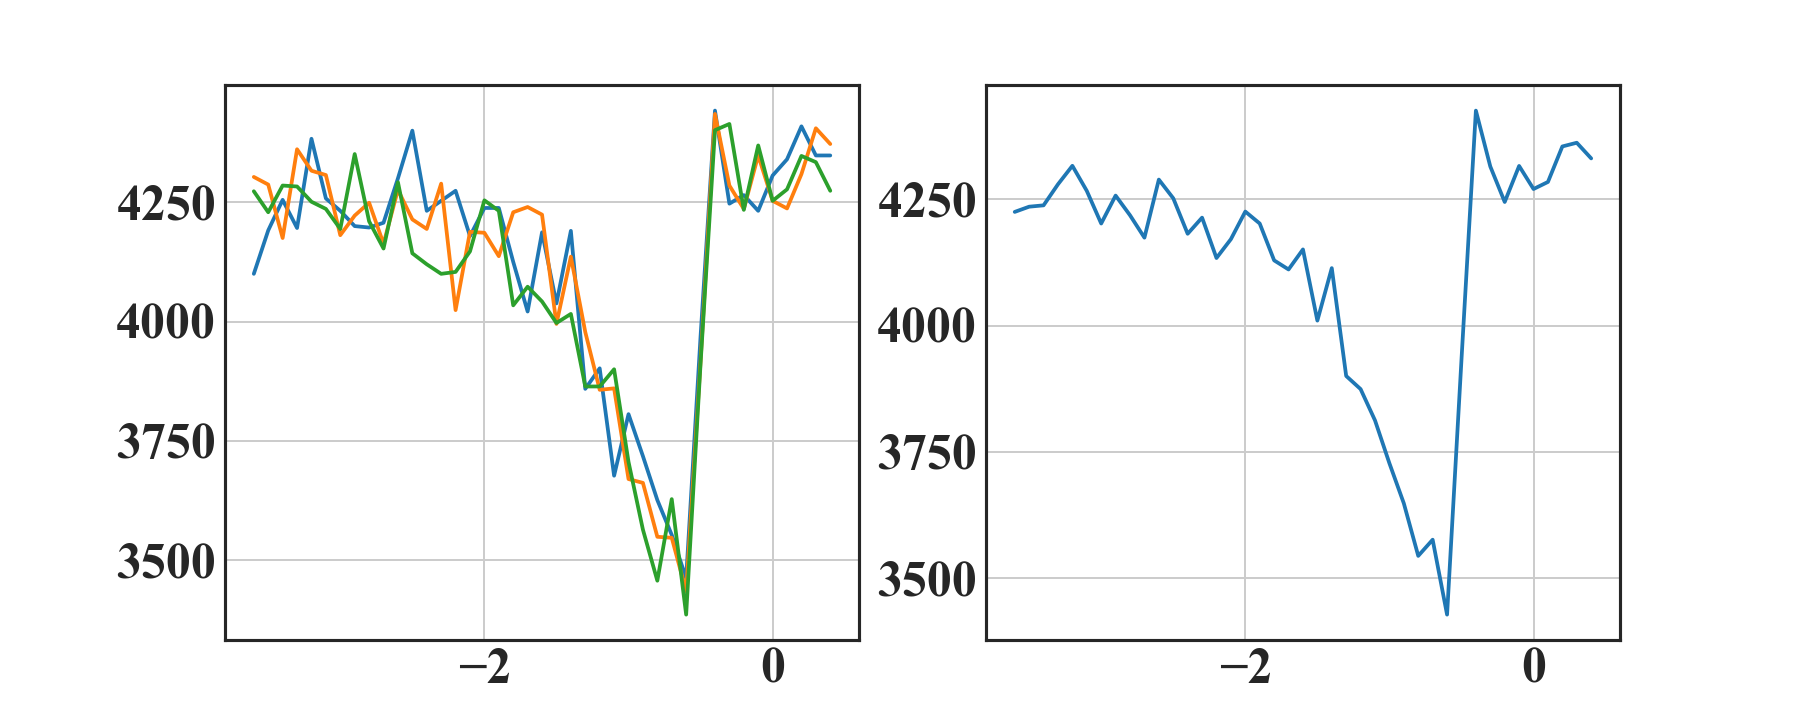

No handles with labels found to put in legend.


In [43]:
fig, ax1 = plt.subplots(1,2, figsize=(10,4))
#ax1.plot(data[:,2])
for i in range(d.shape[0]):
    ax1[0].plot(x_vals[i,:], d[i,:], label='%d' %scan_numbers[i])
ax1[0].grid()
ax1[1].plot(x_vals.mean(axis=0), d.mean(axis=0))
ax1[1].grid()
plt.legend(ncol=3, bbox_to_anchor=(0.5, 0.05))
#ax2 = ax1.twinx()b
#ax2.plot(data[:,5], 'r-')

(80, 3)


<IPython.core.display.Javascript object>


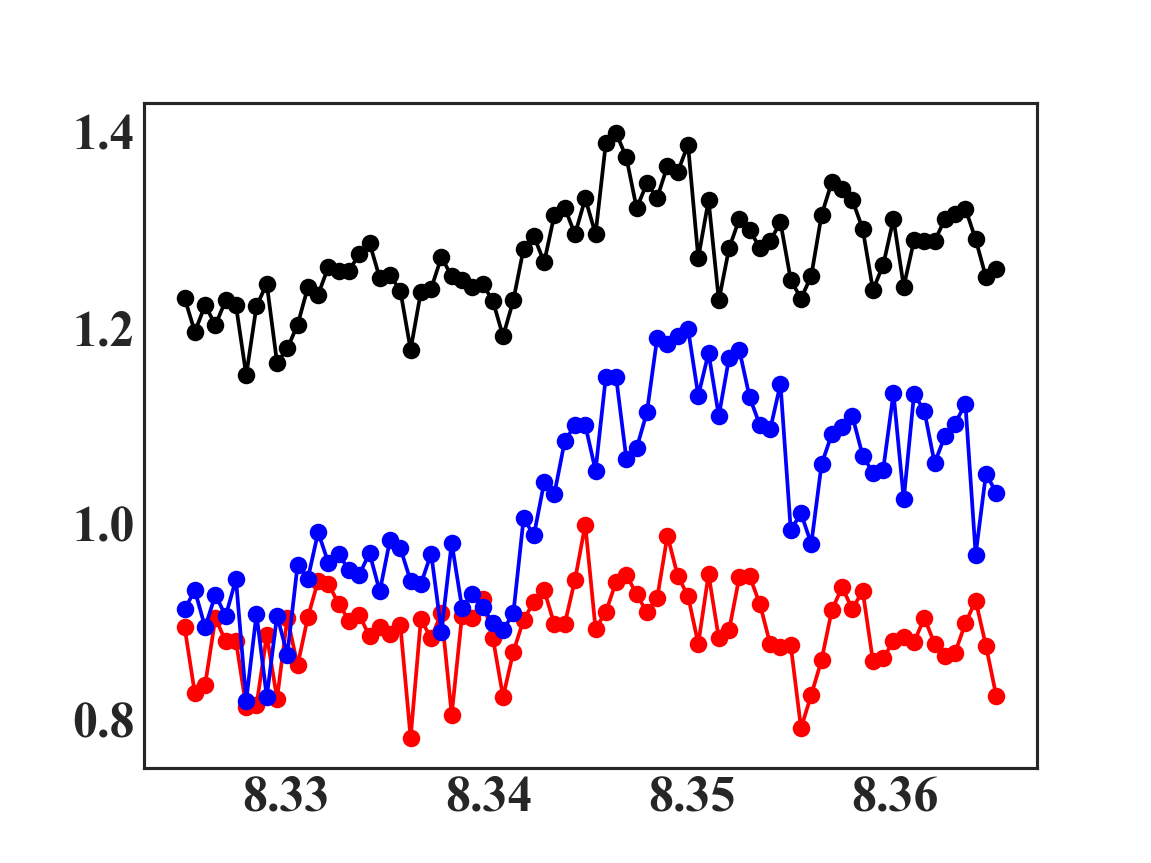

In [9]:
maxes=np.zeros(d.shape[0])
maxes2=np.zeros(d2.shape[0])
maxes_au=np.zeros(d.shape[0])
maxes_film=np.zeros(d.shape[0])
maxes_pd=np.zeros(d.shape[0])

print(d.shape)

x=np.linspace(E_start, E_step*d.shape[0]+E_start, d.shape[0])
x2=np.linspace(E_start2, E_step2*d2.shape[0]+E_start2, d2.shape[0])

for i in range(d.shape[0]):
    maxes_au[i]=np.sum(d[i,0])
    maxes_film[i]=np.sum(d[i,1])
    maxes_pd[i]=np.sum(d[i,-1])
    
for i in range(d2.shape[0]):
    maxes2[i]=np.sum(d2[i,-4:])
    #maxes2[i]=np.sum(d[i,-5:])
    
fig, ax1 = plt.subplots()
ax1.plot(x,maxes_au/np.max(maxes_au),'ro-', x, maxes_pd/np.max(maxes_pd)+0.2, 'bo-', x, maxes_film/np.max(maxes_film)+0.4, 'ko-')

#ax1.plot(x,maxes*1,'ro-', x2, maxes2, 'bo-')
#ax1.plot(x,maxes-maxes2,'ro-')
# ax1.plot(x,maxes2,'go-')

In [28]:
data3=readMDA(path, showHelp=1)


/Volumes/sector26/2019R2/20190806/mda/26idbSOFT_0098.mda is a 1-D file; 1 dimensions read in.
dim[0] = dictionary of 13 scan-environment PVs
   usage: dim[0]['sampleEntry'] -> ('description', 'unit string', 'value', 'EPICS_type', 'count')
dim[1] = <mda.scanDim object at 0x1c1c7aea20>
   usage: dim[1].p[2].data -> 1D array of positioner 2 data
   usage: dim[2].d[7].data -> 2D array of detector 7 data
 
   each scan dimension (i.e., dim[1], dim[2], ...) has the following fields: 
      time      - date & time at which scan was started: b'Aug 06, 2019 23:10:34.542941'
      name - name of scan record that acquired this dimension: 'b'26idbSOFT:scan1''
      curr_pt   - number of data points actually acquired: 41
      npts      - number of data points requested: 41
      nd        - number of detectors for this scan dimension: 70
      d[]       - list of detector-data structures
      np        - number of positioners for this scan dimension: 1
      p[]       - list of positioner-data s

In [32]:
data3[1].p[0].data

[-3.6,
 -3.5,
 -3.4,
 -3.3,
 -3.1999999999999997,
 -3.0999999999999996,
 -2.9999999999999996,
 -2.8999999999999995,
 -2.7999999999999994,
 -2.6999999999999993,
 -2.599999999999999,
 -2.499999999999999,
 -2.399999999999999,
 -2.299999999999999,
 -2.199999999999999,
 -2.0999999999999988,
 -1.9999999999999987,
 -1.8999999999999986,
 -1.7999999999999985,
 -1.6999999999999984,
 -1.5999999999999983,
 -1.4999999999999982,
 -1.3999999999999981,
 -1.299999999999998,
 -1.199999999999998,
 -1.0999999999999979,
 -0.9999999999999979,
 -0.8999999999999979,
 -0.7999999999999979,
 -0.699999999999998,
 -0.599999999999998,
 -0.499999999999998,
 -0.399999999999998,
 -0.29999999999999805,
 -0.19999999999999804,
 -0.09999999999999803,
 1.970645868709653e-15,
 0.10000000000000198,
 0.20000000000000198,
 0.300000000000002,
 0.400000000000002]